## Modelo de identificação de fraude de cartão de crédito

Este projeto tem como objetivo a criação de um modelo de machine learning para identificar fraudes em cartão de crédito, a base de dados utilizada está disponibilizada no site kaggle, esta base contém apenas variáveis numéricas, resultado da transformação PCA (Análise de componentes principais), devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados.

Para este projeto o foco será na identificação de fraudes o mais precisamente possível mantendo o erro das transações não fraude perto dos 10-15%.

Base de dados utilizada: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Informações da base:
<br>
'Time' (tempo): contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
<br>
'Amount' (valor): é o valor da transação.
<br>
'Class' (classe): é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.
<br>
Características V1, V2, … V28 são os principais componentes obtidos com PCA.

Obs: Para este modelo, já realizei o download da base de dados ('creditcard.csv') no kaggle e também irei disponibilizar o arquivo no repositório do projeto.

## Índice
* [Extração e Tratamento de dados](#etl)
    * [Carregando a base de dados](#import)
    * [Tratamento dos dados](#tratamento)
    * [Dividindo a base de dados](#dividir)
* [Criando modelo de machine learning](#ml)
    * [Primeiro modelo](#first)
    * [Random Undersampling](#under)
    * [Random Oversampling](#over)
    * [Undersampling com Cluster Centroids](#cc)
    * [Undersampling com Near Miss](#nm)
    * [Oversampling com SMOTE](#smote)
    * [Oversampling com ADASYN](#adasyn)
    * [Combinando métodos](#comb)
    * [Testando alguns modelos de machine learning com Random Undersampling](#test)
* [GridSearchCV](#gridsearchcv)
    * [Regressão Logística](#rl)
    * [SVC](#svc)
    * [Random Forest](#rf)
    * [KNN](#knn)
* [Conclusão](#conclusion)

#### Pacotes necessários para a criação do projeto

In [1]:
# Extração e tratamento dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceamento da base de dados (imbalanced-learn)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids 
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN 

# Modelo de machine learning
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Classificadores de modelos de machien learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Extração e Tratamento dos dados <a class="anchor" id="etl"></a>

#### Importando a base de dados <a class="anchor" id="import"></a>

In [2]:
df_transacoes = pd.read_csv('creditcard.csv')
df_transacoes.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Verificando informações do Data Frame

O Data Frame possui 31 colunas contendo valores numéricos contendo 284.807 linhas cada coluna

In [4]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Resumo estatístico do Data Frame

In [5]:
df_transacoes.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Verificando valores nulos no Data Frame

In [6]:
df_transacoes.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Verificando distribuição da variável 'Class' no Data Frame percentualmente

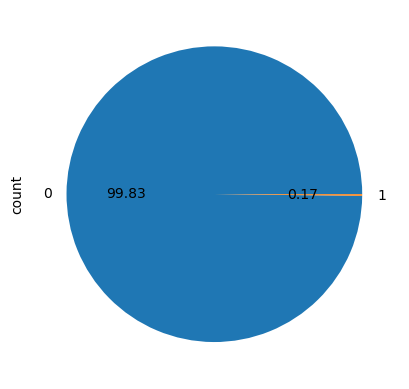

In [11]:
df_transacoes['Class'].value_counts().plot.pie(autopct='%.2f');

#### Antes da separação da base de dados em treino e teste irei alterar as colunas "Time" e "Amount" para que elas possuam apenas valores entre 0 e 1 <a class="anchor" id="tratamento"></a>

In [3]:
# Coluna Time
df_transacoes.Time = df_transacoes.Time / df_transacoes.Time.max()

In [4]:
# Coluna Amount
df_transacoes.Amount = df_transacoes.Amount / df_transacoes.Amount.max()

In [6]:
# Verificando a alteração, é possível notar que o valor mínimo está aparecendo como 0 e o máximo como 1 para ambas as colunas
df_transacoes[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,0.548717,0.003439
std,0.274828,0.009736
min,0.000000,0.000000
25%,0.313681,0.000218
50%,0.490138,0.000856
75%,0.806290,0.003004
max,1.000000,1.000000


#### Separando a base de dados para teste e treino <a class="anchor" id="dividir"></a>

In [5]:
X = df_transacoes.drop('Class',axis=1)
y = df_transacoes.Class

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

## Criando modelo de Machine Learning <a class="anchor" id="ml"></a>

#### Irei criar um modelo inicial com a base de dados sem alterações como comparativo para os próximos modelos.
#### O modelo escolhido sera o DecisionTreeClassifier <a class="anchor" id="first"></a>

In [9]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
# Acurácia
accuracy_score(y_test,y_pred)

0.9991594582229457

In [12]:
# Matriz de confusão
confusion_matrix(y_test,y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

In [13]:
# Precisão
precision_score(y_test,y_pred)

0.7577639751552795

In [14]:
# Recall
recall_score(y_test,y_pred)

0.7530864197530864

#### Com a base de dados sem alterações, foi possível obter uma boa acurácia, porém é possível observar que um alto valor de transações consideradas fraude (40), foi considerada como não fraude pelo modelo, como o objetivo é prever da melhor forma possível as transações fraude, devemos realizar alterações nos dados de forma a criar um modelo com uma melhor precisão
#### Para balancear a base de dados, que atualmente contém a grande maioria de transações que não são fraudes, iremos utilizar o pacote imbalanced-learn, que irá fazer com que o número de fráudes seja equivalente ao número de transações que não são fraudes.
#### Irei abordar alguns dos tipos de balanceamento que o pacote disponibiliza (oversampling e undersampling) e irei selecionar o que melhor se adequa ao meu modelo.

#### Primeiro caso: Undersampling com RandomUnderSampler <a class="anchor" id="under"></a>

Neste modelo, pude melhorar muito o recall, o modelo melhorou em classificar os registros como fraude, porém ao mesmo tempo ele passou a errar mais ao classificar as transações que não eram fraude como fraude.

In [6]:
rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X_train, y_train)

In [7]:
# Verificando valores após o undersampling
y_res.value_counts()

Class
0    330
1    330
Name: count, dtype: int64

In [8]:
# Criando o modelo para RandomUnderSampler
clfRU = tree.DecisionTreeClassifier(random_state=42)
clfRU = clfRU.fit(X_res, y_res)

In [11]:
# Fazendo a previsão para os dados de teste
y_predRU = clfRU.predict(X_test)

In [12]:
# Calculando a acurácia
accuracy_score(y_test,y_predRU)

0.9004543181503825

In [13]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predRU)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

In [23]:
# Visualizando a precisão
precision_score(y_test,y_predRU)

0.015493254637436763

In [22]:
# Visualizando o recall
recall_score(y_test,y_predRU)

0.9074074074074074

#### Segundo caso: Oversampling com RandomOverSampler <a class="anchor" id="over"></a>

Utilizando o parametro shrinkage para não utilizar os valores repetidos (os dados variam em pouco valor para não se manterem os mesmos) este modelo melhorou um pouco em classificar as transações não fraude em relação ao modelo Undersampling, porém obteve desempenho inferior em prever transações consideradas fraude, desta forma o modelo não atende ao objetivo de ter o mínimo de erro em transações consideradas fraude

In [33]:
ros = RandomOverSampler(random_state=42, shrinkage=0.5)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [26]:
# Verificando valores após o oversampling
y_res.value_counts()

Class
0    190490
1    190490
Name: count, dtype: int64

In [35]:
# Criando o modelo para RandomOverSampler
clfRO = tree.DecisionTreeClassifier(random_state=42)
clfRO = clfRO.fit(X_res, y_res)

In [36]:
# Fazendo a previsão para os dados de teste
y_predRO = clfRO.predict(X_test)

In [37]:
# Calculando a acurácia
accuracy_score(y_test,y_predRO)

0.9921159309266175

In [38]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predRO)

array([[93109,   716],
       [   25,   137]], dtype=int64)

In [39]:
# Visualizando a precisão
precision_score(y_test,y_predRO)

0.16060961313012895

In [40]:
# Visualizando o recall
recall_score(y_test,y_predRO)

0.845679012345679

#### Terceiro caso: Undersampling com ClusterCentroids <a class="anchor" id="cc"></a>

Utilizando o ClusterCentroids, foi possível acertar mais transações consideradas fraude, porém, ao mesmo tempo, o número de transações não fraude sendo consideradas como fraude está quase 3 vezes maior, foi possível adquirir uma boa precisão na identificação da fraude, porém o modelo se tornou mais "rigoroso" classificando mais transações não fraude como fraude.

In [5]:
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X_train, y_train)

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
clfCC = tree.DecisionTreeClassifier(random_state=42)
clfCC = clfCC.fit(X_res, y_res)

In [7]:
# Fazendo a previsão para os dados de teste
y_predCC = clfCC.predict(X_test)

In [8]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predCC)

array([[23192, 70633],
       [    3,   159]], dtype=int64)

#### Quarto caso: Undersampling com NearMiss <a class="anchor" id="nm"></a>

Com o NearMiss, obtive um desempenho melhor na identificação de fraude porém para transações não fraude, houve praticamente 50% dos valores classificados equivocadamente como fraude.

In [10]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)

In [11]:
clfNM = tree.DecisionTreeClassifier(random_state=42)
clfNM = clfNM.fit(X_res, y_res)

In [12]:
# Fazendo a previsão para os dados de teste
y_predNM = clfNM.predict(X_test)

In [13]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predNM)

array([[50758, 43067],
       [    9,   153]], dtype=int64)

#### Quinto caso: Oversampling com SMOTE <a class="anchor" id="smote"></a>

Com SMOTE o modelo obteve um melhor desempenho na identificação de transações não fraude, porém um numero elevado de transações fraude foi classificado equivocadamente como não fraude.

In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [17]:
clfS = tree.DecisionTreeClassifier(random_state=42)
clfS = clfS.fit(X_res, y_res)

In [18]:
# Fazendo a previsão para os dados de teste
y_predS = clfS.predict(X_test)

In [19]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predS)

array([[93650,   175],
       [   42,   120]], dtype=int64)

#### Sexto caso: Oversampling com ADASYN <a class="anchor" id="adasyn"></a>

Com ADASYN o modelo obteve um melhor desempenho na identificação de transações não fraude, porém um numero elevado de transações fraude foi classificado equivocadamente como não fraude. Obteve um desempenho um pouco superior ao SMOTE.

In [20]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

In [21]:
clfA = tree.DecisionTreeClassifier(random_state=42)
clfA = clfA.fit(X_res, y_res)

In [22]:
# Fazendo a previsão para os dados de teste
y_predA = clfA.predict(X_test)

In [23]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predA)

array([[93662,   163],
       [   38,   124]], dtype=int64)

#### Sétimo caso: Combinando métodos com SMOTEENN  <a class="anchor" id="comb"></a>

Combinando tecnicas de Oversampling e Undersampling obtivemos um desempenho bom para classificação de transações não fraude, porém para transações fraude, houve um número alto de erros na classificação.

In [24]:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [25]:
y_res.value_counts()

Class
1    181952
0    173770
Name: count, dtype: int64

In [26]:
clfSE = tree.DecisionTreeClassifier(random_state=42)
clfSE = clfSE.fit(X_res, y_res)

In [27]:
# Fazendo a previsão para os dados de teste
y_predSE = clfSE.predict(X_test)

In [28]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_predSE)

array([[93629,   196],
       [   36,   126]], dtype=int64)

#### Nesta etapa do projeto, irei criar outros tipos de modelos, para comparação, irei utilizar a técnica Undersampling com RandomUnderSampler <a class="anchor" id="test"></a>

In [7]:
# Realizando o Undersampling
rus = RandomUnderSampler(random_state=42)
X_resRU, y_resRU = rus.fit_resample(X_train, y_train)

#### Primeiro modelo: Árvore de decisão

In [16]:
# Fazendo o fit para os dados de treino já balanceados
clf_AD = tree.DecisionTreeClassifier(random_state=42).fit(X_resRU, y_resRU)

In [17]:
# Fazendo a previsão para os dados de teste
y_pred_AD = clf_AD.predict(X_test)
y_pred_proba_AD = clf_AD.predict_proba(X_test)[:,1]

In [18]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_AD)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

#### Segundo modelo: Regressão Logistica

In [8]:
# Fazendo o fit para os dados de treino já balanceados
clf_RL = LogisticRegression(random_state=0).fit(X_resRU, y_resRU)

In [20]:
# Fazendo a previsão
y_pred_RL = clf_RL.predict(X_test)
y_pred_proba_RL = clf_RL.predict_proba(X_test)[:,1]

In [21]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_RL)

array([[89875,  3950],
       [   15,   147]], dtype=int64)

#### Terceiro modelo: Support Vector Machine

In [22]:
# Fazendo o fit para os dados de treino já balanceados
clf_SVC = SVC(random_state=0,probability=True).fit(X_resRU, y_resRU)

In [23]:
# Fazendo a previsão
y_pred_SVC = clf_SVC.predict(X_test)
y_pred_proba_SVC = clf_SVC.predict_proba(X_test)[:,1]

In [24]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_SVC)

array([[92433,  1392],
       [   24,   138]], dtype=int64)

#### Quarto modelo: KNN

In [25]:
# Fazendo o fit para os dados de treino já balanceados
clf_KNN = KNeighborsClassifier(n_neighbors=3).fit(X_resRU, y_resRU)

In [29]:
# Fazendo a previsão
y_pred_KNN = clf_KNN.predict(X_test.values)
y_pred_proba_KNN = clf_KNN.predict_proba(X_test.values)[:,1]

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_KNN)  

array([[91136,  2689],
       [   15,   147]], dtype=int64)

#### Quinto modelo: Random Forest

In [31]:
# Fazendo o fit para os dados de treino já balanceados
clf_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_resRU, y_resRU)

In [32]:
# Fazendo a previsão
y_pred_RF = clf_RF.predict(X_test)
y_pred_proba_RF = clf_RF.predict_proba(X_test)[:,1]

In [33]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_RF)

array([[93168,   657],
       [   25,   137]], dtype=int64)

#### Analisando o desempenho destes 5 modelos irei selecionar 3 que considero que tiveram um desempenho melhor e irei buscar formas de melhora-los

Os modelos selecionados serão:
- Regressão Logística
- KNN
- Random Forest

A Regressão Logística e o KNN, obtiveram o mesmo resultado na previsão de transações fraude, que foi o menor número encontrado entre os modelos, ao mesmo tempo que mantiveram o erro na previsão de transações não fraude em um valor menor, comparado a Árvore de Decisão.

O Random Forest foi o modelo que obteve um baixo número de erro na previsão de transações não fraude e manteve um número baixo de erros para transações fraude, tendo apenas 10 a mais em relação aos modelos que erraram menos.

## Utilizando GridSearchCV para testar parâmetros dos modelos de machine learning <a class="anchor" id="gridsearchcv"></a>

#### Melhorando parâmetros da Regressão Logística com GridSearchCV <a class="anchor" id="rl"></a>

#### Parâmetros da Regressão Logística que irei testar 

GridSearchCV criado com foco no melhor desempenho do "Recall", buscando o mínimo erro para transações fraude

In [35]:
parametros = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
}

In [43]:
# Criando uma Regressão Logística
LogReg = LogisticRegression(random_state=42, max_iter=10000)

In [47]:
# Criando um novo classificador com os parâmetros escolhidos
clf_RL_GS = GridSearchCV(LogReg, parametros, scoring='recall' )

In [48]:
# Fazendo o fit dos nossos dados
clf_RL_GS = clf_RL_GS.fit(X_resRU, y_resRU)

In [49]:
# Visualizando os melhores parÂmetros definidos pelo GridSearchCV
clf_RL_GS.best_params_

{'C': 0.001, 'solver': 'liblinear'}

In [50]:
# Usando o modelo para fazer as previsões
y_pred_RL_GS = clf_RL_GS.predict(X_test)

In [51]:
# Analisando a matriz de confusão
confusion_matrix(y_test, y_pred_RL_GS)

array([[81700, 12125],
       [   10,   152]], dtype=int64)

In [52]:
# Recall
recall_score(y_test, y_pred_RL_GS)

0.9382716049382716

In [53]:
#precisao
precision_score(y_test, y_pred_RL_GS)

0.012380874806548831

In [55]:
# Visualizando o que foi feito pelo GridSearchCV em um DataFrame
pd.DataFrame(clf_RL_GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005801,4.000426e-04,0.002400,4.901740e-04,0.001,newton-cg,"{'C': 0.001, 'solver': 'newton-cg'}",0.772727,0.818182,0.893939,0.833333,0.833333,0.830303,0.038807,32
1,0.004001,2.336015e-07,0.002201,3.999949e-04,0.001,lbfgs,"{'C': 0.001, 'solver': 'lbfgs'}",0.772727,0.818182,0.893939,0.833333,0.833333,0.830303,0.038807,32
2,0.002601,4.899987e-04,0.002401,4.899404e-04,0.001,liblinear,"{'C': 0.001, 'solver': 'liblinear'}",0.954545,1.000000,0.954545,0.954545,0.984848,0.969697,0.019165,1
3,0.018804,2.039914e-03,0.002600,4.903102e-04,0.001,sag,"{'C': 0.001, 'solver': 'sag'}",0.772727,0.818182,0.893939,0.833333,0.833333,0.830303,0.038807,32
4,0.045810,4.119234e-03,0.002801,3.998520e-04,0.001,saga,"{'C': 0.001, 'solver': 'saga'}",0.772727,0.818182,0.893939,0.833333,0.833333,0.830303,0.038807,32
5,0.007001,6.325605e-04,0.002401,4.899598e-04,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.833333,0.878788,0.939394,0.893939,0.924242,0.893939,0.037113,28
6,0.004201,4.001141e-04,0.002601,4.899793e-04,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.833333,0.878788,0.939394,0.893939,0.924242,0.893939,0.037113,28
7,0.003001,3.234067e-07,0.002801,4.001858e-04,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.924242,0.909091,0.954545,0.909091,0.939394,0.927273,0.017670,5
8,0.039409,3.263007e-03,0.002801,3.999714e-04,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.833333,0.878788,0.939394,0.893939,0.924242,0.893939,0.037113,28
9,0.077817,7.575342e-03,0.002601,4.900182e-04,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.833333,0.878788,0.939394,0.893939,0.924242,0.893939,0.037113,28


#### Melhorando parâmetros para o modelo SVC <a class="anchor" id="svc"></a>

In [56]:
# Parametros do SVC que irei testar
parametros = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto']
}

In [57]:
# Selecionando a SVC
svc_GS = SVC(random_state=0,probability=True)

In [58]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_SVC_GS = GridSearchCV(svc_GS,parametros,
                     scoring='recall'
                     )

In [59]:
# Fazendo o fit dos nossos dados
clf_SVC_GS.fit(X_resRU, y_resRU)

GridSearchCV(estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [60]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
clf_SVC_GS.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [61]:
# Usando esse modelo para fazer as previsões
y_pred_SVC_GS = clf_SVC_GS.predict(X_test)

In [62]:
# Analisando a matriz de confusão 
confusion_matrix(y_test,y_pred_SVC_GS)

array([[84402,  9423],
       [   13,   149]], dtype=int64)

#### Melhorando parâmetros para Random Forest <a class="anchor" id="rf"></a>

In [63]:
# Parâmetros do Random Forest que irei utilizar
parametros = {
    'n_estimators':[10,20,30,40,50,100,200],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,4,5,6,7,8,9]
}

In [64]:
# Selecionando o Random Forest
RF_GS = RandomForestClassifier(random_state=0)

In [65]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_RF_GS = GridSearchCV(RF_GS,parametros,
                     scoring='recall'
                     )

In [66]:
# Fazendo o fit dos nossos dados
clf_RF_GS = clf_RF_GS.fit(X_resRU,y_resRU)

In [67]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
clf_RF_GS.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 30}

In [68]:
# Usando esse modelo para fazer as previsões
y_pred_RF_GS = clf_RF_GS.predict(X_test)

In [69]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_RF_GS)

array([[91100,  2725],
       [   17,   145]], dtype=int64)

#### Melhorando parametros para KNN <a class="anchor" id="knn"></a>

In [70]:
# Utilizando os parâmetros do KNN
parametros = {
    'n_neighbors': [3,5,7,9,11],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'weights': ['uniform','distance']
}

In [78]:
# Selecionando o KNN
KNN_GS = KNeighborsClassifier()

In [79]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_KNN_GS = GridSearchCV(KNN_GS, parametros,
                     scoring='recall'
                     )

In [81]:
# Fazendo o fit dos nossos dados
clf_KNN_GS = clf_KNN_GS.fit(X_resRU.values,y_resRU.values)

In [82]:
clf_KNN_GS.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

In [84]:
# Usando esse modelo para fazer as previsões
y_pred_KNN_GS = clf_KNN_GS.predict(X_test.values)

In [85]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_KNN_GS)

array([[91136,  2689],
       [   15,   147]], dtype=int64)

### Conclusão: Selecionando o modelo que melhor atende o objetivo <a class="anchor" id="conclusion"></a>

Para este modelo, o objetivo que tive foi manter o número de erro nas transações fraude o menor o possível mantendo também uma proporção aceitávei para as transações não fraude.

Desta forma o modelo que será utilizado será o modelo de Regressão Logística, utilizando o RandomUnderSampling e com os seguintes parâmetros:
- 'C': 0.001
- 'solver': 'liblinear'

Este modelo obteve como desempenho a seguinte matriz de confusão:
- Das 93.825 transações não fraude, o modelo identificou 81.700 como não fraude e 12.125 como fraude, desta forma, aproximadamente 12,9% dos dados tiveram a previsão incorreta.
- Das 162 transações fraude, o modelo identificou corretamente 152 como fraude e 10 como não fraude, desta forma, aproximadamente 6,17% dos dados tiveram a previsão incorreta.

Para este projeto escolhi como objetivo priorizar o "recall", que é referente as transações fraude, este modelo teve um recall de aproximadamente 93%, porém seria possível buscar outras formas de priorizar de acordo com as necessidades, podendo buscar uma melhor precisão, um modelo que buscasse o melhor para ambos, tudo dependendo da necessidade do projeto.